# Multivariate Linear Regression

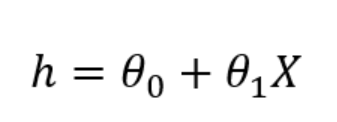

The Simple line Equation - theta(0) is the intercept and theta(1) is the slope

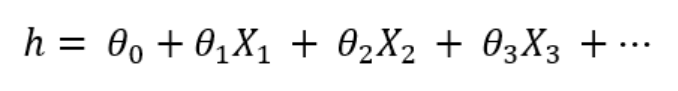

The line equation for multiple variables

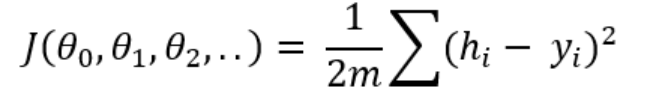

The cost function which calculates the distance from predicted to actual values

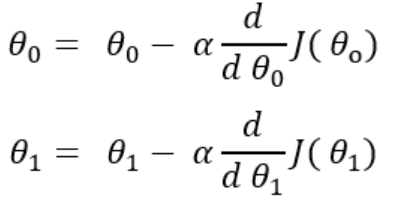

We take the partial differential of the cost fucntion with respect to each theta value and deduct the value from the existing theta value

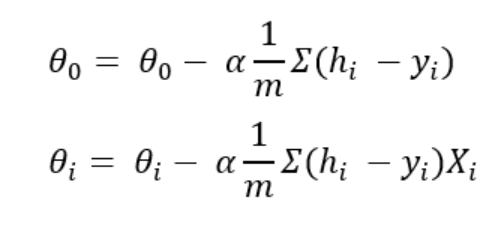

Gradient descent algorithm after the differentiation
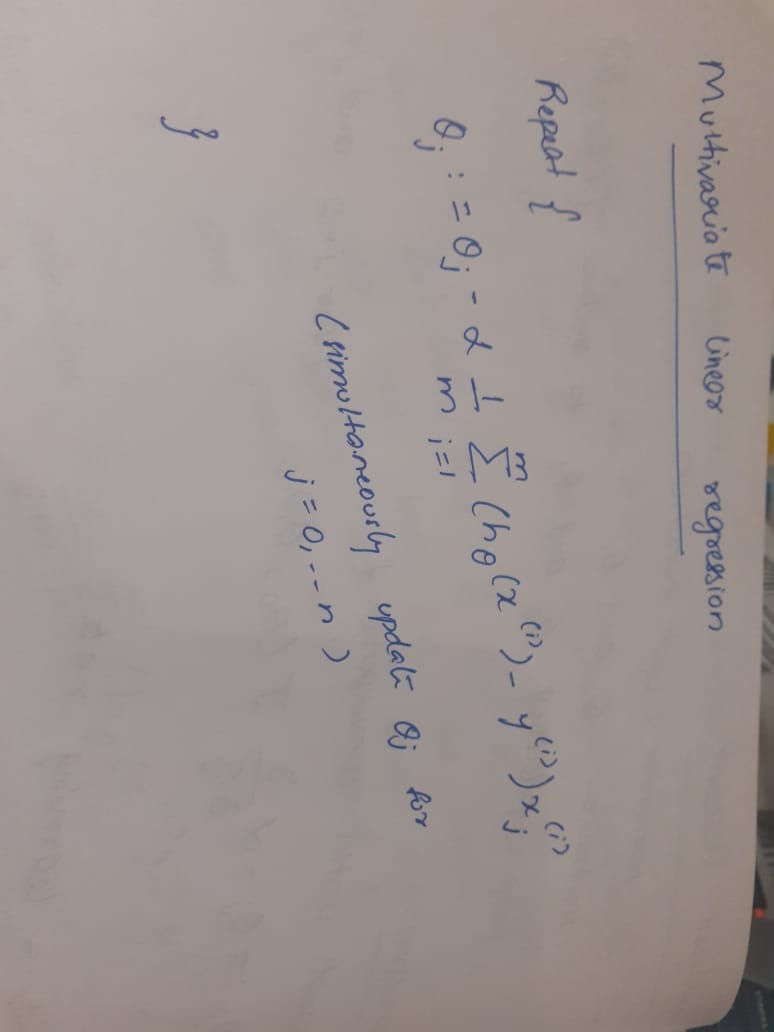
Gradient Descent Algorithm

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df=pd.read_csv(r'C:\Users\satya\Downloads\hiring.csv')

In [28]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


replace the NAN values with zero and convert words to numbers

In [29]:
df['experience']=df['experience'].fillna('zero')

In [30]:
df.dtypes

experience                     object
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [31]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [32]:
from word2number import w2n

In [33]:
df['experience'] = df['experience'].apply(w2n.word_to_num) #convert words to numbers

In [34]:
import math
medianscore=math.floor(df['test_score(out of 10)'].mean())

In [35]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(medianscore) #filling na values

In [36]:
df['salary($)']=df['salary($)']/45000 #scaling

In [37]:
df = pd.concat([pd.Series(1, index=df.index, name='0'), df], axis=1) #concat ones column
df.head()

,0,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,1,0,8.0,9,1.111111
1,1,0,8.0,6,1.000000
2,1,5,6.0,7,1.333333
3,1,2,10.0,10,1.444444
4,1,7,9.0,6,1.555556


In [38]:
x=df[['0','experience','test_score(out of 10)','interview_score(out of 10)']]

In [39]:
x

,0,experience,test_score(out of 10),interview_score(out of 10)
0,1,0,8.0,9
1,1,0,8.0,6
2,1,5,6.0,7
3,1,2,10.0,10
4,1,7,9.0,6
5,1,3,7.0,10
6,1,10,7.0,7
7,1,11,7.0,8


In [40]:
y=df['salary($)']

In [41]:
y

0    1.111111
1    1.000000
2    1.333333
3    1.444444
4    1.555556
5    1.377778
6    1.600000
7    1.777778
Name: salary($), dtype: float64

In [81]:
def hypothesis(theta, X): # predict y given teta values
    #theta=np.transpose(theta)
    #return theta*X
    return np.dot(theta, X.T)

In [82]:
def computeCost(X, y, theta): #compute cost
    #y1 = hypothesis(theta, X)
    #y1=np.sum(y1, axis=1)
    return (1/2*m)*np.sum((hypothesis(theta,X)-y)**2)

In [85]:
m=len(df)
def gradientDescent(X, y, theta, alpha, i):
    #theta = np.array([0]*len(X.columns))
    J = []
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
       # y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [94]:
theta = np.array([0.0]*len(x.columns))
J, j, theta = gradientDescent(x, y, theta, 0.01, 500)

In [87]:
y_hat = hypothesis(theta, x) #preict y values

In [88]:
y_hat

array([1.15087544, 0.97158952, 1.23763212, 1.49155464, 1.52964629,
       1.34857757, 1.6564895 , 1.78585117])

In [89]:
theta

array([0.04614631, 0.06959969, 0.07085892, 0.05976197])

In [90]:
y_hat*45000

array([51789.39481766, 43721.52824904, 55693.44518722, 67119.95888629,
       68834.08296475, 60685.99080731, 74542.0275331 , 80363.30257422])

In [91]:
error=np.sum((y-y_hat)**2)#calculate error

In [92]:
error

0.018546636690139007

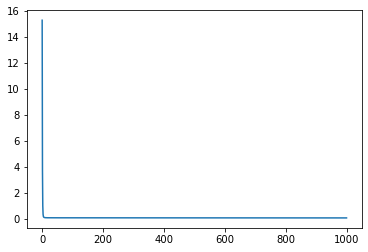

In [93]:
plt.plot(J)

Using Normal equation formula


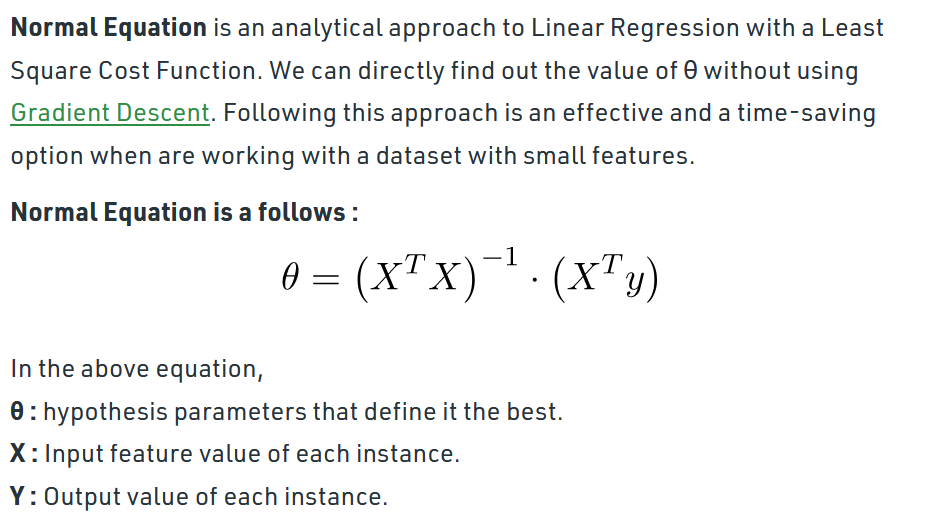

In [53]:
newdata=x.to_numpy()

In [54]:
actual=y.to_numpy()

In [55]:
x_transpose=np.transpose(newdata)

In [56]:
x_transpose_dot=x_transpose.dot(newdata)

In [57]:
temp_1 = np.linalg.inv(x_transpose_dot)

In [58]:
temp_2 = x_transpose.dot(actual)

In [59]:
teta=temp_1.dot(temp_2)
yhat=newdata.dot(teta)

In [60]:
teta

array([0.33317003, 0.06493931, 0.04936242, 0.04772183])

In [61]:
error=np.sum((actual-yhat)**2)

In [65]:
yhat*45000

array([52090.46734071, 45648.01964161, 57964.2290839 , 64525.1061363 ,
       68325.21184635, 60783.44785255, 74796.8832586 , 79866.63483999])

In [62]:
error

0.010511173964596148

error is less using normal equation formula rather than gradient descent